 # **Feature Engineering**

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(
    {
        'color': ['red', 'green', 'blue','red']

    }
)

In [ ]:
df

,color
0,red
1,green
2,blue
3,red


- **Use One-Hot Encoding by Pandas**

In [ ]:
ohe_df = pd.get_dummies(df['color'])

In [ ]:
ohe_df

,blue,green,red
0,False,False,True
1,False,True,False
2,True,False,False
3,False,False,True


In [ ]:
ohe_df = pd.get_dummies(df['color'], drop_first=True)
ohe_df

,green,red
0,False,True
1,True,False
2,False,False
3,False,True


- **OHE By scikit-learn**

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False)

In [ ]:
one_hot_encoder=encoder.fit_transform(df[['color']])
one_hot_encoder

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [ ]:
encoded_df = pd.DataFrame(one_hot_encoder, columns=encoder.get_feature_names_out())
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0


# **LABEL ENCODER**

In [ ]:
df

,color
0,red
1,green
2,blue
3,red


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df["color_encoder"] = encoder.fit_transform(df["color"])

In [ ]:
df

,color,color_encoder
0,red,2
1,green,1
2,blue,0
3,red,2


# **ORDINAL ENCODING**

In [ ]:
data = {
    'color': ['red', 'blue','green', 'blue','red'],
    'size': ['S', 'M', 'L', 'M', 'S'],
    'price': [10,20,30,20,10],
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,color,size,price
0,red,S,10
1,blue,M,20
2,green,L,30
3,blue,M,20
4,red,S,10


In [ ]:
size_categories = [['S','M','L']]

In [ ]:
size_categories

[['S', 'M', 'L']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encoder = OrdinalEncoder(categories=size_categories)

In [ ]:
encoder

OrdinalEncoder(categories=[['S', 'M', 'L']])

In [ ]:
df['size_encoded'] = encoder.fit_transform(df[['size']])


In [ ]:
df

,color,size,price,size_encoded
0,red,S,10,0.0
1,blue,M,20,1.0
2,green,L,30,2.0
3,blue,M,20,1.0
4,red,S,10,0.0


# **STANDARDIZATION**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
ages = np.random.normal(loc = 40, scale = 10, size = 1000)
salary = np.random.normal(loc = 50000, scale = 15000, size = 1000)

In [ ]:
data_df = pd.DataFrame({
    'ages': ages,
    'salary': salary
})

In [ ]:
data_df.head()

,ages,salary
0,24.595620,43471.602456
1,36.146923,50890.946613
2,29.890239,44846.609043
3,35.640790,56362.887049
4,44.251660,50454.987375


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

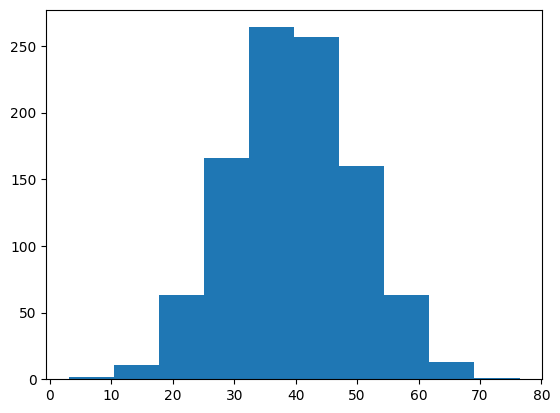

In [ ]:
plt.hist(data_df["ages"])
plt.show()

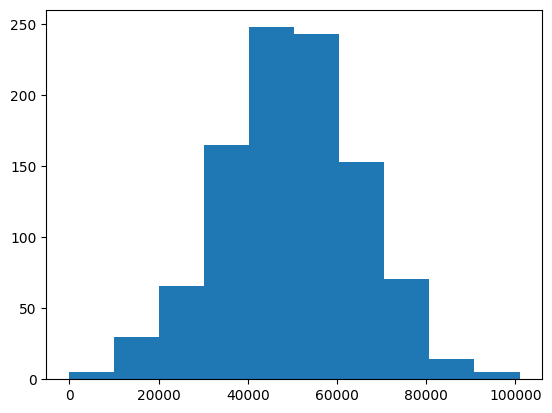

In [ ]:
plt.hist(data_df["salary"])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
standard_scaler = StandardScaler()

standardized_data = standard_scaler.fit_transform(data_df)

standardized_df = pd.DataFrame(standardized_data, columns=data_df.columns)

In [ ]:
data_df.head()

,ages,salary
0,24.595620,43471.602456
1,36.146923,50890.946613
2,29.890239,44846.609043
3,35.640790,56362.887049
4,44.251660,50454.987375


In [ ]:
standardized_df.head()

,ages,salary
0,-1.451490,-0.401208
1,-0.332734,0.075330
2,-0.938701,-0.312893
3,-0.381754,0.426788
4,0.452217,0.047329


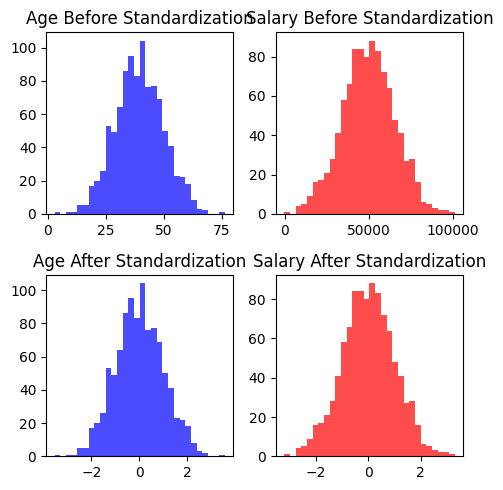

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(5,5))

# Before standardization
ax[0, 0].hist(data_df['ages'], bins=30, color='b', alpha=0.7)
ax[0, 0].set_title('Age Before Standardization')

ax[0, 1].hist(data_df['salary'], bins=30, color='r', alpha=0.7)
ax[0, 1].set_title('Salary Before Standardization')

# After standardization
ax[1, 0].hist(standardized_df['ages'], bins=30, color='b', alpha=0.7)
ax[1, 0].set_title('Age After Standardization')

ax[1, 1].hist(standardized_df['salary'], bins=30, color='r', alpha=0.7)
ax[1, 1].set_title('Salary After Standardization')

plt.tight_layout()
plt.show()

# **NORMALIZATION**

In [ ]:
data = np.random.uniform(low=10, high=100, size=(1000, 2))
data_df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])

In [ ]:
data_df.head()

,Feature1,Feature2
0,30.743142,66.559143
1,98.863107,34.203644
2,45.722848,49.676847
3,96.183185,43.361251
4,14.988863,34.443093


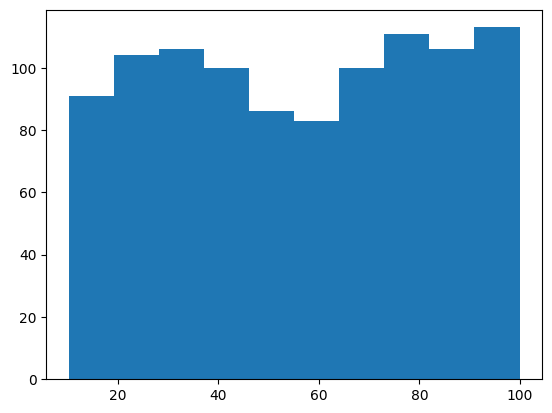

In [ ]:
plt.hist(data_df["Feature1"])
plt.show()

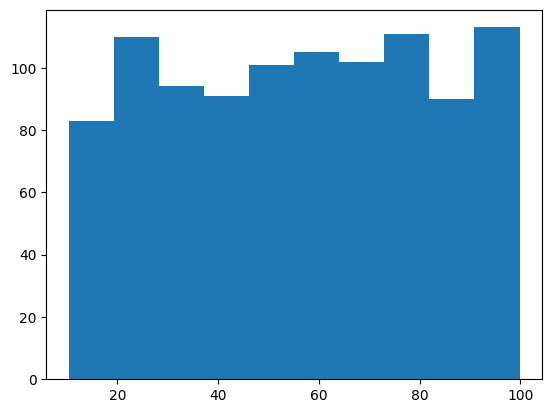

In [ ]:
plt.hist(data_df["Feature2"])
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data_df)

scaled_df = pd.DataFrame(scaled_data, columns=data_df.columns)

In [ ]:
data_df.head()

,Feature1,Feature2
0,30.743142,66.559143
1,98.863107,34.203644
2,45.722848,49.676847
3,96.183185,43.361251
4,14.988863,34.443093


In [ ]:
scaled_df.head()

,Feature1,Feature2
0,0.228997,0.628117
1,0.988260,0.266826
2,0.395961,0.439604
3,0.958390,0.369082
4,0.053400,0.269500


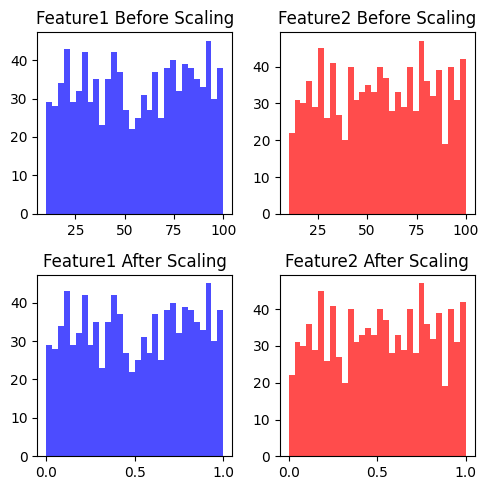

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(5,5))

# Before scaling
ax[0, 0].hist(data_df['Feature1'], bins=30, color='b', alpha=0.7)
ax[0, 0].set_title('Feature1 Before Scaling')

ax[0, 1].hist(data_df['Feature2'], bins=30, color='r', alpha=0.7)
ax[0, 1].set_title('Feature2 Before Scaling')

# After scaling
ax[1, 0].hist(scaled_df['Feature1'], bins=30, color='b', alpha=0.7)
ax[1, 0].set_title('Feature1 After Scaling')

ax[1, 1].hist(scaled_df['Feature2'], bins=30, color='r', alpha=0.7)
ax[1, 1].set_title('Feature2 After Scaling')

plt.tight_layout()
plt.show()

# **Z-SCORE**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import zscore

In [ ]:
data = {
    'value': [10, 12, 12, 13, 12, 11, 14, 100, 10, 12, 12, 13, 12, 11, 14, 10, 12, 12, 13, 12, 11, 14, 50]
 }

df = pd.DataFrame(data)

In [ ]:
df

,value
0,10
1,12
2,12
3,13
4,12
5,11
6,14
7,100
8,10
9,12


In [ ]:
df['z-score'] = zscore(df['value'])

In [ ]:
df

,value,z-score
0,10,-0.388372
1,12,-0.284505
2,12,-0.284505
3,13,-0.232571
4,12,-0.284505
5,11,-0.336438
6,14,-0.180638
7,100,4.285637
8,10,-0.388372
9,12,-0.284505


In [ ]:
threshold = 3

In [ ]:
df['Outlier'] = np.abs(df['z-score']) > threshold

In [ ]:
df

,value,z-score,Outlier
0,10,-0.388372,False
1,12,-0.284505,False
2,12,-0.284505,False
3,13,-0.232571,False
4,12,-0.284505,False
5,11,-0.336438,False
6,14,-0.180638,False
7,100,4.285637,True
8,10,-0.388372,False
9,12,-0.284505,False


Text(0.5, 1.0, 'Before Removing Outliers')

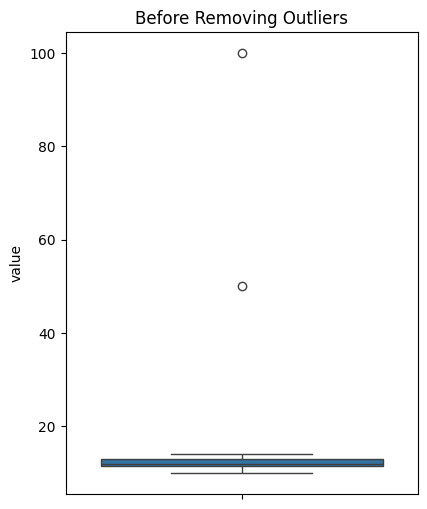

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot( y = df['value'])
plt.title("Before Removing Outliers")

In [ ]:
df_clean = df[df['Outlier'] == False]

In [ ]:
df_clean

,value,z-score,Outlier
0,10,-0.388372,False
1,12,-0.284505,False
2,12,-0.284505,False
3,13,-0.232571,False
4,12,-0.284505,False
5,11,-0.336438,False
6,14,-0.180638,False
8,10,-0.388372,False
9,12,-0.284505,False
10,12,-0.284505,False


Text(0.5, 1.0, 'After Removing Outliers')

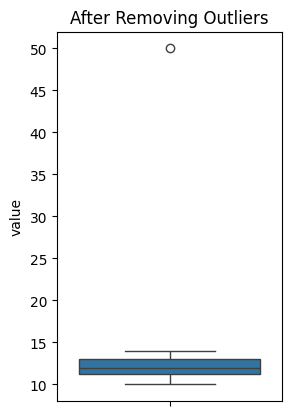

In [ ]:
plt.subplot(1, 2, 1)
sns.boxplot( y = df_clean['value'])
plt.title("After Removing Outliers")

# **IQR METHOD**

In [ ]:
data = {
    'Value': np.append(np.random.normal(50, 10, 100), [150, 200, 250, 300, 350, 400])
}
df = pd.DataFrame(data)

In [ ]:
df

,Value
0,48.202686
1,17.268002
2,53.725545
3,49.109330
4,40.591414
...,...
101,200.000000
102,250.000000
103,300.000000
104,350.000000


<Axes: ylabel='Value'>

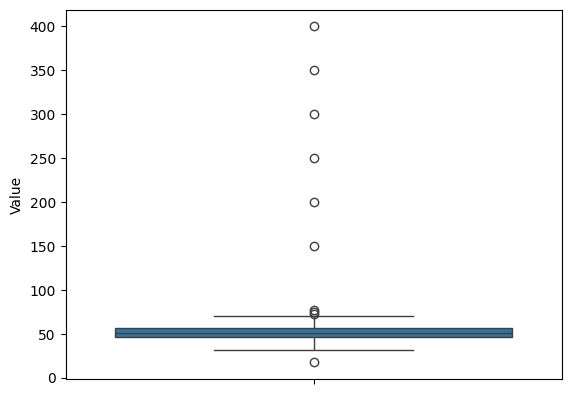

In [ ]:
sns.boxplot(y = df['Value'])

In [ ]:
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
IQR

np.float64(10.660127929690788)

In [ ]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.05 * IQR

In [ ]:
lower_bound, upper_bound

(np.float64(29.64200343982359), np.float64(67.48545759022589))

In [ ]:
df['Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

In [ ]:
df

,Value,Outlier
0,48.202686,False
1,17.268002,True
2,53.725545,False
3,49.109330,False
4,40.591414,False
...,...,...
101,200.000000,True
102,250.000000,True
103,300.000000,True
104,350.000000,True


In [ ]:
df_clean = df[df['Outlier'] == False]

<Axes: ylabel='Value'>

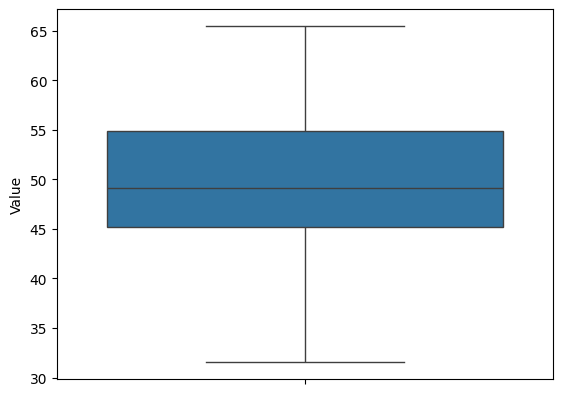

In [ ]:
sns.boxplot(y = df_clean['Value'])

# **PERCENTILE METHOD**

In [ ]:
data = np.concatenate([np.random.normal(loc=0, scale=1, size=90), np.array([10, 12, 15, -8, -10])])

df = pd.DataFrame(data, columns=['Value'])

In [ ]:
df

,Value
0,-0.526001
1,0.207612
2,-1.818737
3,0.452876
4,0.109378
...,...
90,10.000000
91,12.000000
92,15.000000
93,-8.000000


<Axes: ylabel='Value'>

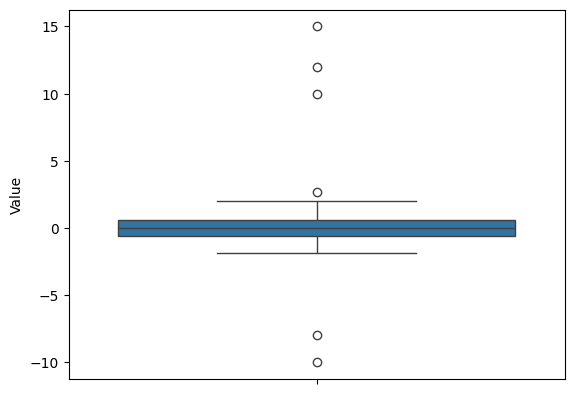

In [ ]:
sns.boxplot(y = df['Value'])

In [ ]:
lower_bounce = np.percentile(df['Value'], 5)
upper_bounce = np.percentile(df['Value'], 95)

In [ ]:
lower_bounce

np.float64(-1.7778390438301916)

In [ ]:
upper_bounce

np.float64(1.9981227414829879)

In [ ]:
lower_bound = df['Value'].quantile(0.05)
higher_bound = df['Value'].quantile(0.95)

In [ ]:
lower_bound, higher_bound

(np.float64(-1.7778390438301916), np.float64(1.9981227414829879))

In [ ]:
df['Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > higher_bound)

In [ ]:
df

,Value,Outlier
0,-0.526001,False
1,0.207612,False
2,-1.818737,True
3,0.452876,False
4,0.109378,False
...,...,...
90,10.000000,True
91,12.000000,True
92,15.000000,True
93,-8.000000,True


In [ ]:
cleaned_df = df[(df['Value'] >= lower_bounce) & (df['Value'] <= upper_bounce )]

<Axes: ylabel='Value'>

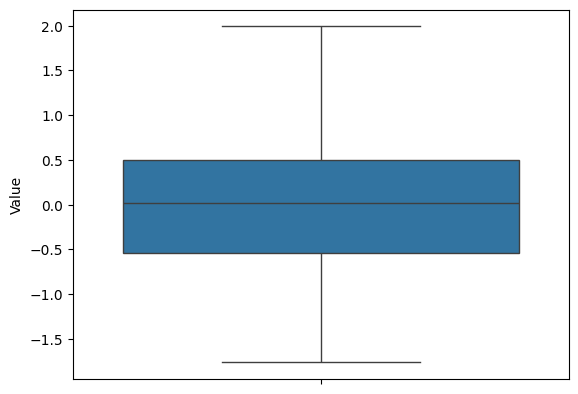

In [ ]:
sns.boxplot(cleaned_df["Value"])

# **WINSORIZATION**

In [ ]:
data = np.concatenate([np.random.normal(loc=0, scale=1, size=50),
                       np.array([10, 12, 15, -8, -10])])

df = pd.DataFrame(data, columns=['Value'])

In [ ]:
df

,Value
0,-1.288321
1,1.042923
2,0.680908
3,-1.424627
4,0.949606
5,0.864808
6,1.893122
7,-0.090235
8,-0.449636
9,0.612165


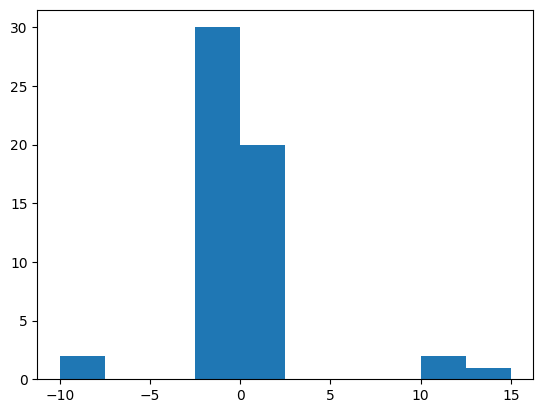

In [ ]:
plt.hist(df['Value'])
plt.show()

In [ ]:
lower_bound1 =np.percentile(df['Value'], 5)
upper_bound1 = np.percentile(df['Value'], 95)

In [ ]:
lower_bound1, upper_bound1

(np.float64(-1.9547904917213113), np.float64(4.325185487985639))

In [ ]:
df['Winsorized'] = df['Value'].clip(lower=lower_bound1, upper=upper_bound1)

In [ ]:
df

,Value,Winsorized
0,-1.288321,-1.288321
1,1.042923,1.042923
2,0.680908,0.680908
3,-1.424627,-1.424627
4,0.949606,0.949606
5,0.864808,0.864808
6,1.893122,1.893122
7,-0.090235,-0.090235
8,-0.449636,-0.449636
9,0.612165,0.612165


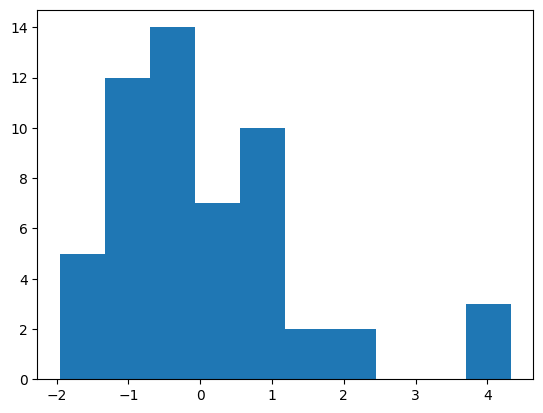

In [ ]:
plt.hist(df['Winsorized'])
plt.show()

<Axes: ylabel='Value'>

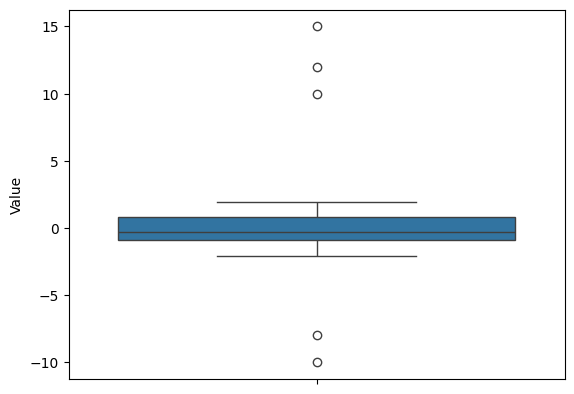

In [ ]:
sns.boxplot(df['Value'])

<Axes: ylabel='Winsorized'>

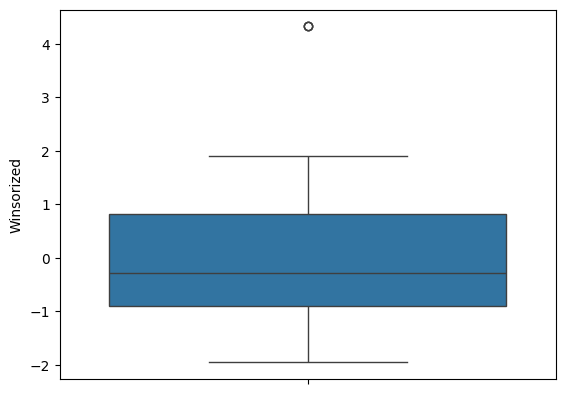

In [ ]:
sns.boxplot(df['Winsorized'])

# **MATHEMATICAL TRANSFORMATION**
 # **1. LOGARTHIM TRANSFORMATION**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

In [ ]:
np.random.seed(0)
data = {
    'value': np.random.exponential(scale=2.0, size=1000)
}
df = pd.DataFrame(data)

In [ ]:
df

,value
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


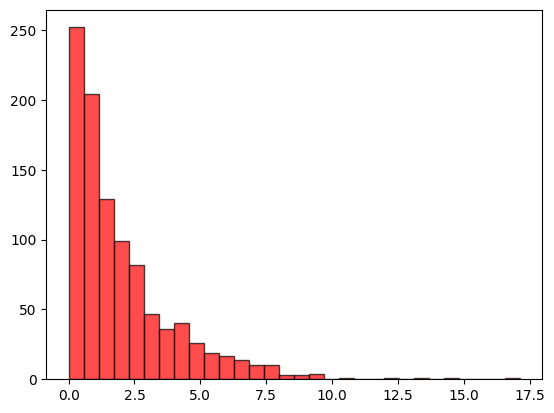

In [ ]:
plt.hist(df['value'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.show()

In [ ]:
skew(df["value"])

np.float64(2.0526452829685935)

In [ ]:
df['log_transformed_value'] = np.log(df['value'] + 1)

In [ ]:
df.head()

,value,log_transformed_value
0,1.591749,0.952333
1,2.511862,1.256146
2,1.846446,1.046071
3,1.574402,0.945617
4,1.102097,0.742935


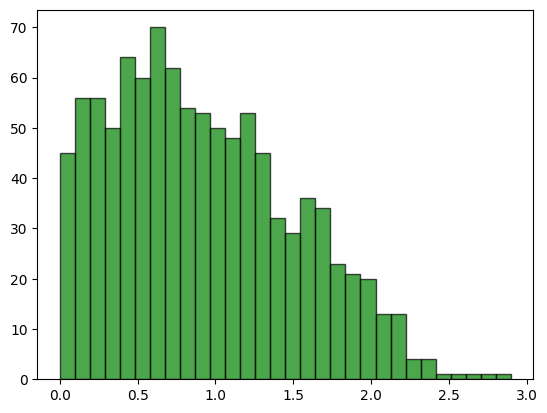

In [ ]:
plt.hist(df['log_transformed_value'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

In [ ]:
skew(df["log_transformed_value"])

np.float64(0.49140926471790436)

# 2 .**SQUARE ROOT TRANSFORMATION**

In [ ]:
np.random.seed(0)
data = {
    'original_data': np.random.exponential(scale=2.0, size=1000)
}
df = pd.DataFrame(data)
df

,original_data
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
995,0.205564
996,1.446892
997,5.574577
998,0.519217


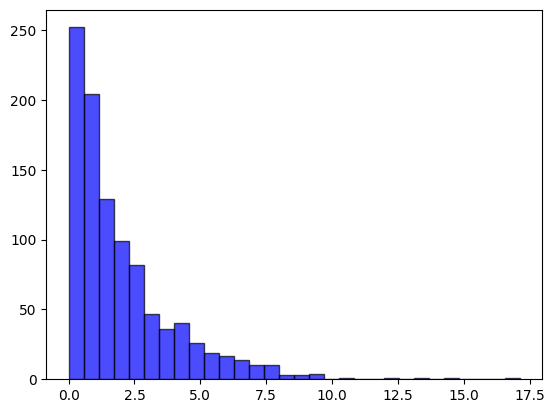

In [ ]:
plt.hist(df['original_data'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

In [ ]:
skew(df["original_data"])

np.float64(2.0526452829685935)

In [ ]:
df['sqrt_transformed'] = np.sqrt(df['original_data'])

In [ ]:
df

,original_data,sqrt_transformed
0,1.591749,1.261645
1,2.511862,1.584885
2,1.846446,1.358840
3,1.574402,1.254752
4,1.102097,1.049808
...,...,...
995,0.205564,0.453392
996,1.446892,1.202868
997,5.574577,2.361054
998,0.519217,0.720567


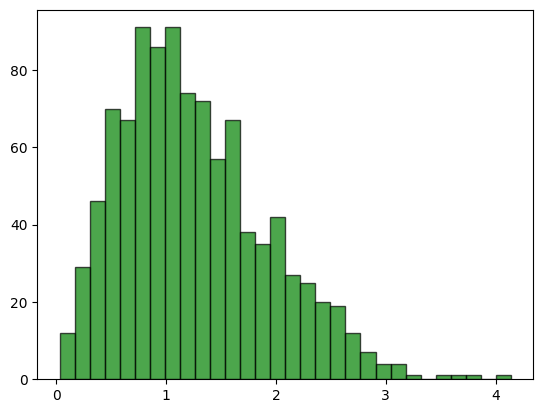

In [ ]:
plt.hist(df['sqrt_transformed'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

In [ ]:
skew(df["sqrt_transformed"])

np.float64(0.6920163230320187)

# 3. **RECIPROCAL TRANSFORMATION**

In [1]:
import numpy as np
import pandas as pd

In [5]:
data = np.random.exponential(scale=2, size=1000)

data = 50 - data

# Create a DataFrame
df = pd.DataFrame(data, columns=['Original'])

In [6]:
df

,Original
0,47.794586
1,48.193817
2,45.690274
3,46.479484
4,49.529094
...,...
995,48.796390
996,45.648128
997,47.758984
998,44.210166


In [9]:
skew(df["Original"])

np.float64(-2.154359667801457)

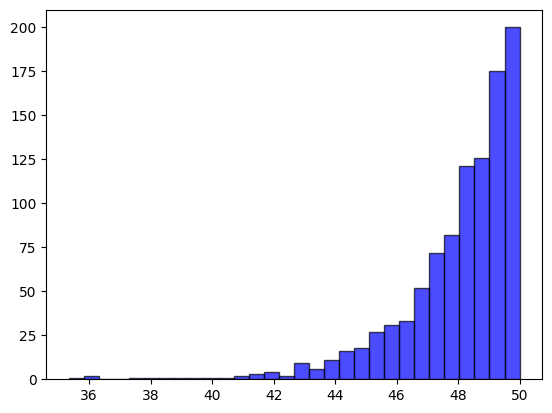

In [10]:
plt.hist(df["Original"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

In [11]:

df['reciprocal_transformed'] = 1 / df['Original']

In [12]:
df.head()

,Original,reciprocal_transformed
0,47.794586,0.020923
1,48.193817,0.020750
2,45.690274,0.021886
3,46.479484,0.021515
4,49.529094,0.020190


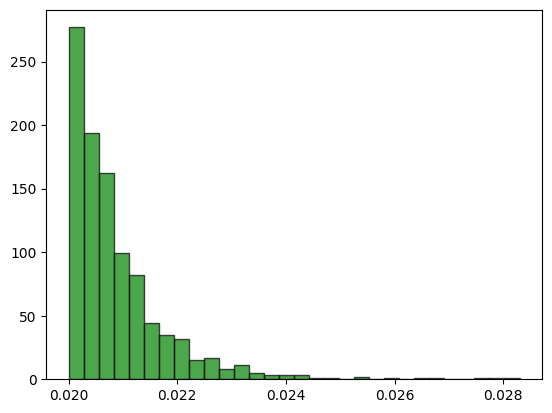

In [13]:
plt.hist(df['reciprocal_transformed'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

In [14]:
skew(df["reciprocal_transformed"])

np.float64(2.868479927590332)

# **4. BOX-COX TRANSFORMATION**

In [15]:
np.random.seed(0)
data = {
    'A': np.random.exponential(scale=2, size=100),  # Positively skewed
    'B': np.random.chisquare(df=2, size=100)        # Positively skewed
}
df = pd.DataFrame(data)
df

,A,B
0,1.591749,2.265268
1,2.511862,0.629443
2,1.846446,2.657516
3,1.574402,6.550286
4,1.102097,0.572042
...,...,...
95,0.404701,1.348489
96,1.766258,0.516026
97,0.040625,0.587015
98,3.531482,0.119562


In [16]:
skew(df["A"])

np.float64(1.7459333876296321)

In [17]:
skew(df["B"])

np.float64(2.3748098222146865)

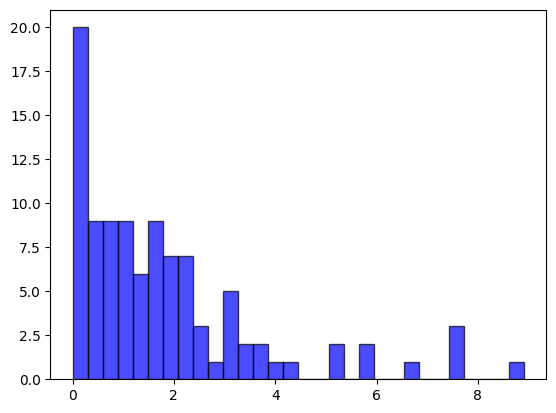

In [18]:
plt.hist(df["A"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

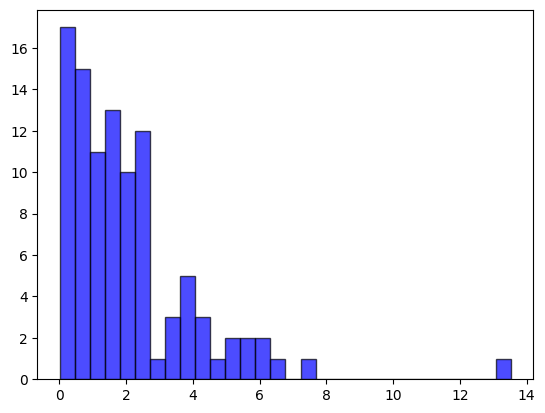

In [19]:
plt.hist(df["B"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

In [22]:
from scipy.stats import boxcox

In [23]:
df["Transformed_A"] , lambda_value_a = boxcox(df["A"])

In [24]:
lambda_value_a

np.float64(0.24399399127053611)

In [28]:
skew(df["A"])

np.float64(1.7459333876296321)

In [30]:
skew(df["Transformed_A"])

np.float64(-0.04892078487750364)

In [31]:
df["Transformed_B"] , lambda_value_b = boxcox(df["B"])

In [32]:
lambda_value_b

np.float64(0.29434303959890085)

In [33]:

skew(df["Transformed_B"])

np.float64(-0.0198085984461394)

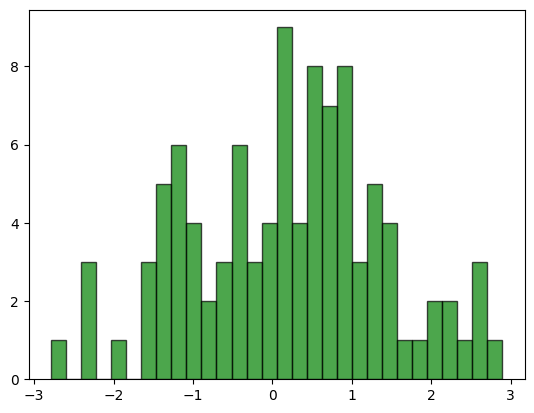

In [27]:
plt.hist(df["Transformed_A"],bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

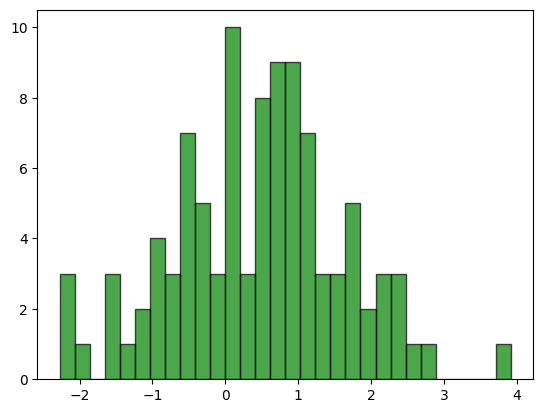

In [34]:
plt.hist(df["Transformed_B"], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

# **5. YEO-JOSHNSON TRANSFORMATION**

In [35]:
np.random.seed(0)
data = {
    'A': np.random.exponential(scale=2, size=100),  # Positively skewed
    'B': np.random.chisquare(df=2, size=100)        # Positively skewed
}
df = pd.DataFrame(data)
df

,A,B
0,1.591749,2.265268
1,2.511862,0.629443
2,1.846446,2.657516
3,1.574402,6.550286
4,1.102097,0.572042
...,...,...
95,0.404701,1.348489
96,1.766258,0.516026
97,0.040625,0.587015
98,3.531482,0.119562


In [36]:
skew(df["A"])

np.float64(1.7459333876296321)

In [37]:

skew(df["B"])

np.float64(2.3748098222146865)

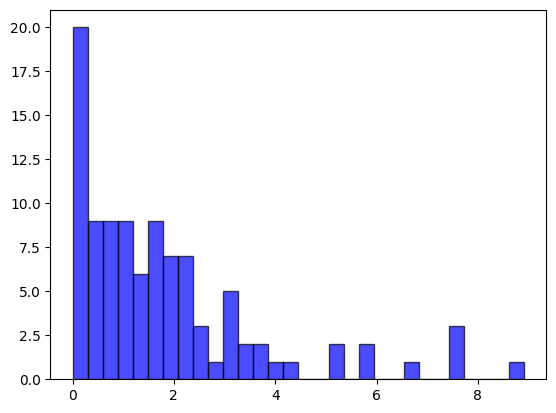

In [38]:
plt.hist(df["A"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

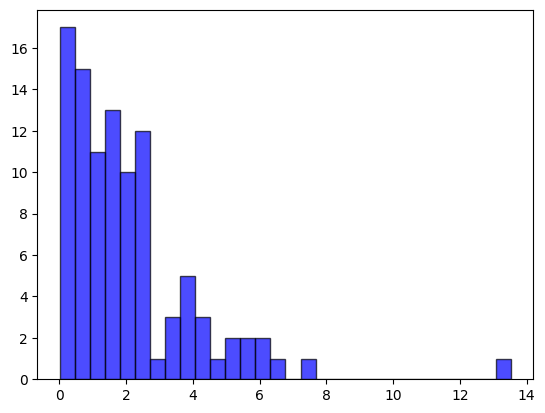

In [39]:
plt.hist(df["B"], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.show()

In [40]:
from scipy.stats import yeojohnson

In [41]:
df["Transformed_A"] , lambda_value_a = yeojohnson(df["A"])
df["Transformed_B"] , lambda_value_b = yeojohnson(df["B"])

In [42]:
lambda_value_a

np.float64(-0.4147072162505532)

In [43]:
lambda_value_b

np.float64(-0.2626374108520304)

In [44]:
skew(df["Transformed_A"])

np.float64(0.07127558483066004)

In [45]:
skew(df["Transformed_B"])

np.float64(0.029695762345079934)

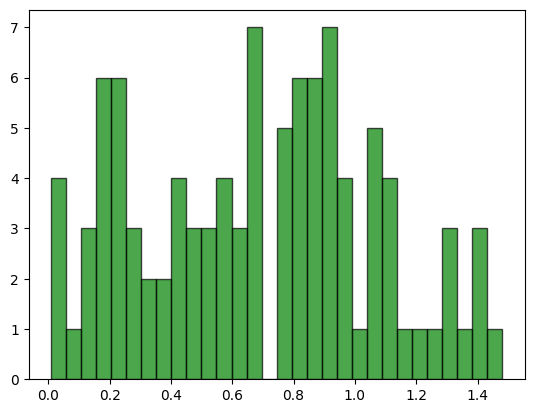

In [46]:
plt.hist(df["Transformed_A"],bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()

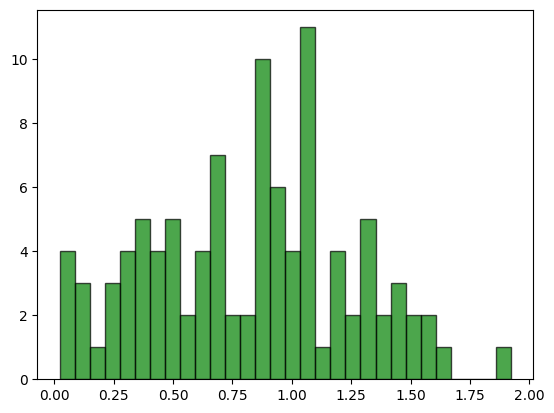

In [47]:
plt.hist(df["Transformed_B"],bins=30, color='green', alpha=0.7, edgecolor='black')
plt.show()